<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augementation

In [0]:
import imgaug as ig
import numpy as np
import matplotlib.pyplot as plt
import os
from imgaug import augmenters as ag

In [0]:
files = [i for i in os.listdir('/content/') if ".jpg" in i]
files

['snowman.jpg',
 'football.jpg',
 'taj mahal.jpg',
 'dog-maltese.jpg',
 'cycle.jpg']

In [0]:
images = [plt.imread(i) for i in files]

In [0]:
def show_img(images):
  fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(20,10))
  axes1 = axes.flatten()
  for i,ax in zip(range(len(images)),axes):
    ax.imshow(images[i])
  plt.show()


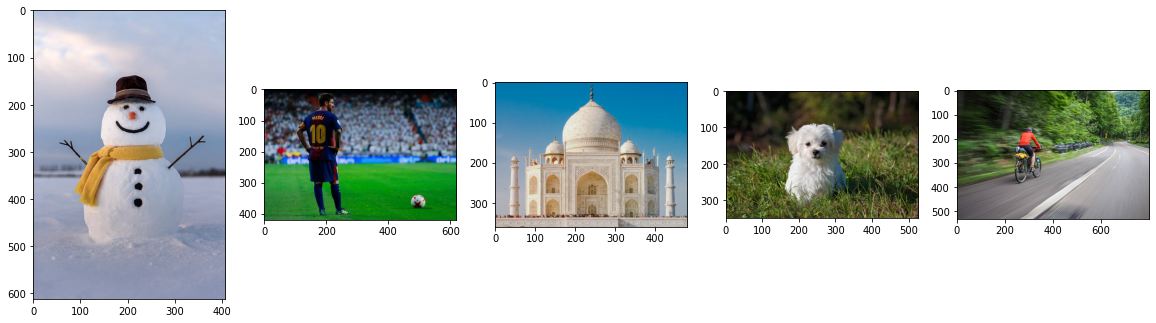

In [0]:
show_img(images)

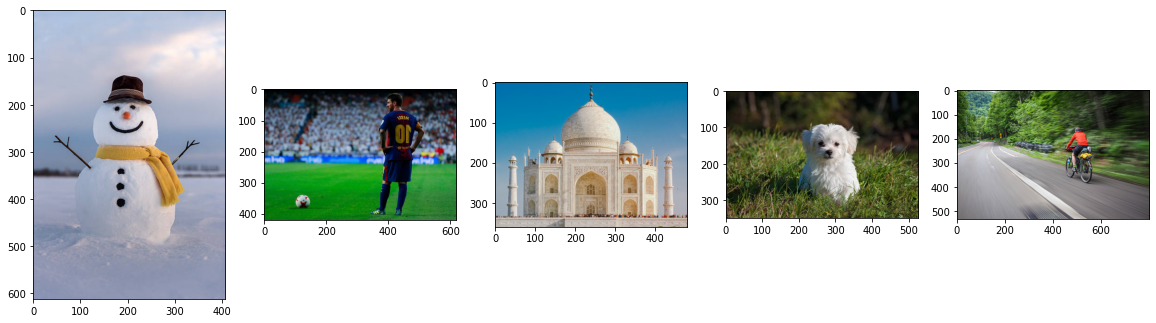

In [0]:
# Flip - LR
aug1 = ag.Fliplr(1)

images2 = aug1.augment_images(images)
show_img(images2)

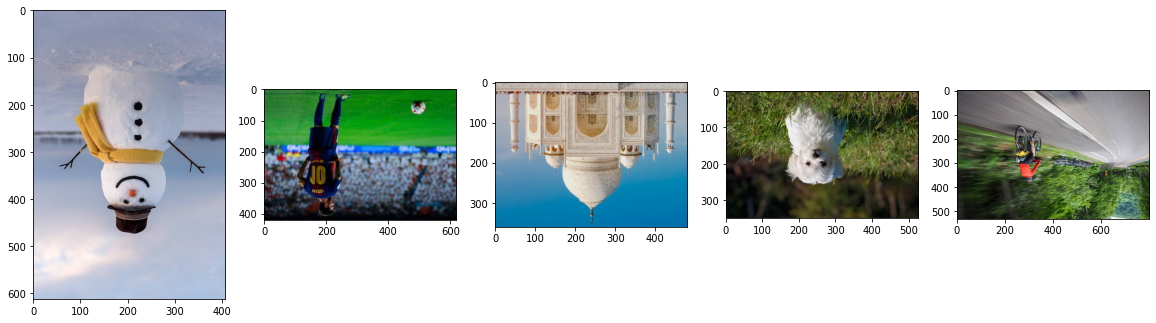

In [0]:
# FLIP - UD

aug1 = ag.Flipud(1)
images3 = aug1.augment_images(images)
show_img(images3)

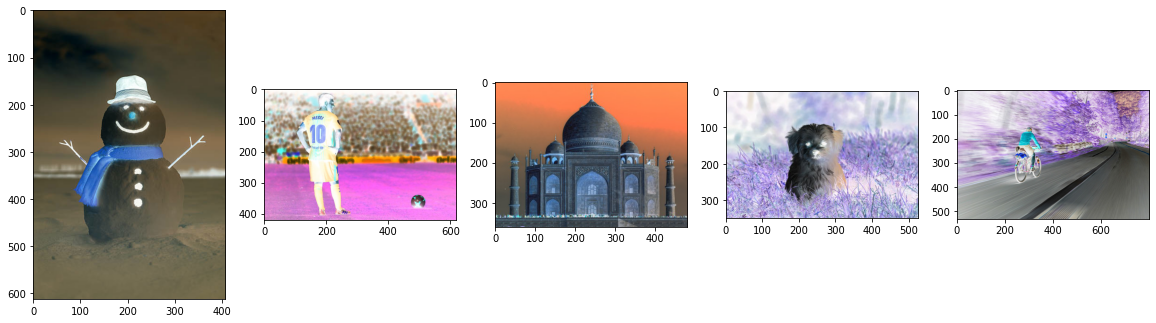

In [0]:
# Invert
aug1 = ag.Invert(1)
images3 = aug1.augment_images(images)
show_img(images3)

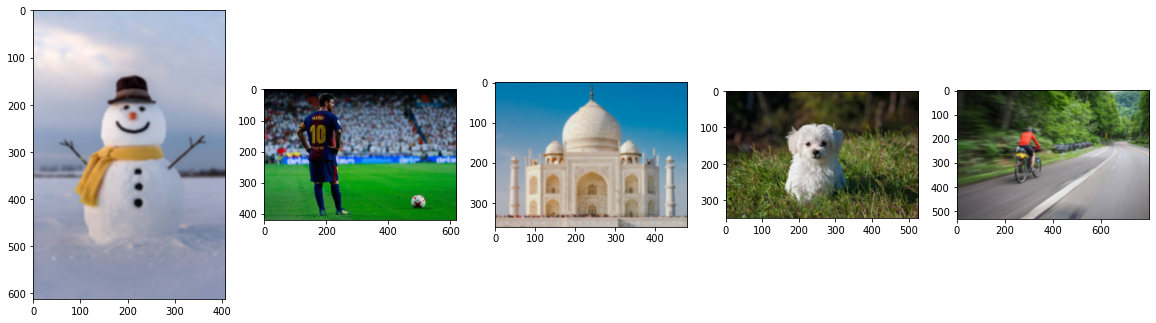

In [0]:
# Average Blur

aug1 = ag.AverageBlur(k=(2,7))
images3 = aug1.augment_images(images)
show_img(images3)

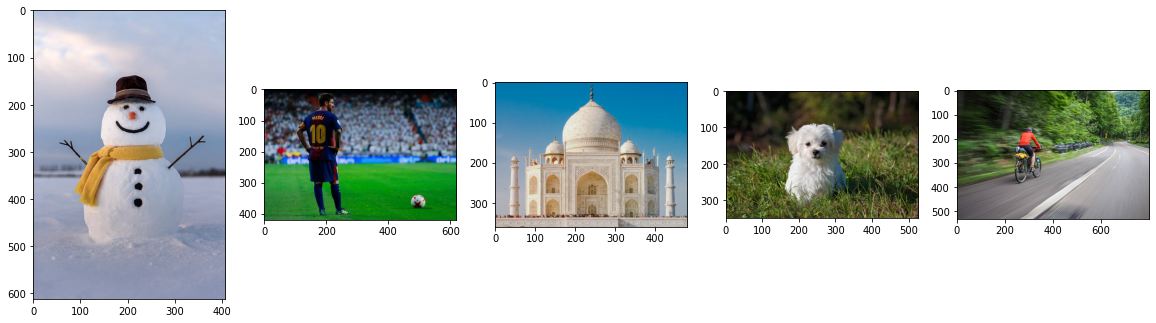

In [0]:
show_img(images)

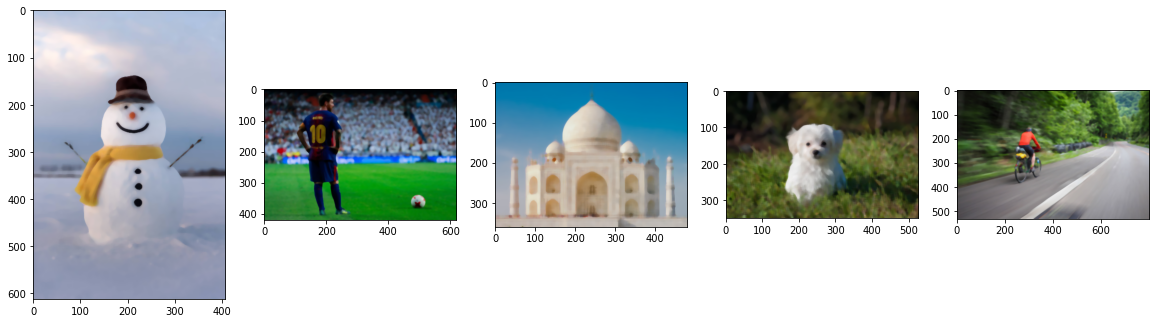

In [0]:
# MedianBlur
aug1 = ag.MedianBlur(k=(5,11))
images3 = aug1.augment_images(images)
show_img(images3)

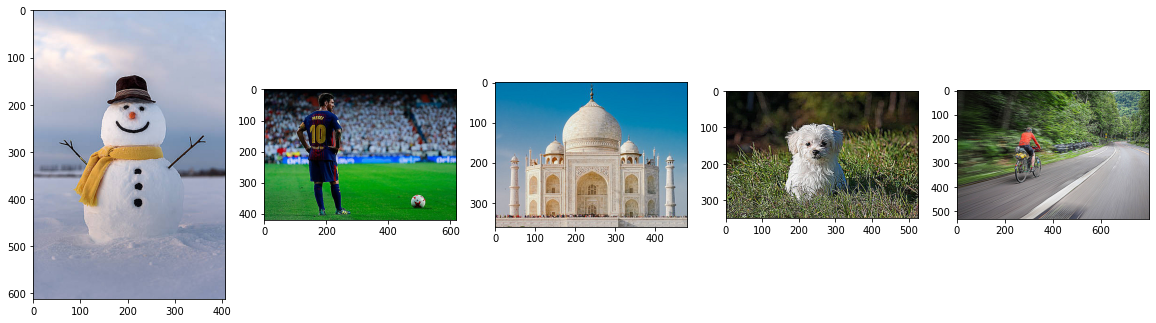

In [0]:
# sharpening

aug1 = ag.Sharpen(alpha=(0.0,1.0),lightness=1)
images3 = aug1.augment_images(images)
show_img(images3)

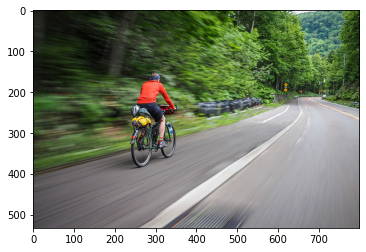

In [0]:
img = images[-1]
plt.imshow(img)

In [0]:
img.shape

(533, 800, 3)

In [0]:
img2 = ig.imresize_single_image(img,(50,50))
img2.shape

(50, 50, 3)

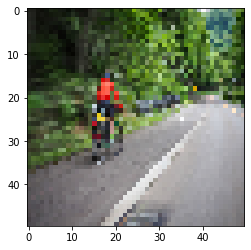

In [0]:
plt.imshow(img2)

# bounding boxes

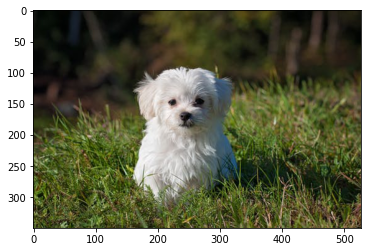

In [0]:
img = images[-2]
plt.imshow(img)
plt.show()

In [0]:
# bounding boxes = x1 = 150, x2 = 300, y1 = 50, y2 = 320

#defin the bounding boxes
bb = ig.BoundingBoxesOnImage([ig.BoundingBox(x1=150,y1=50,x2=300,y2=320)],shape=img.shape)

/usr/local/lib/python3.6/dist-packages/imgaug/augmentables/bbs.py:548: DeprecationWarning: Usage of argument 'thickness' in BoundingBox.draw_on_image() is deprecated. The argument was renamed to 'size'.
  "Usage of argument 'thickness' in BoundingBox.draw_on_image() "


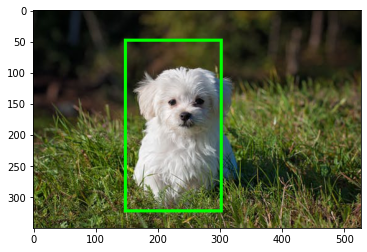

In [0]:
# draw the rectangle
img2 = bb.draw_on_image(img,thickness=5)
plt.imshow(img2)
plt.show()

In [0]:
# Affine = rotate, shear, scale, translate


aug1 = ag.Affine(translate_px={"x":40,"y":60}).to_deterministic()

In [0]:
img_ag = aug1.augment_images([img])[0]
bb_ag = aug1.augment_bounding_boxes([bb])[0]

In [0]:
bb.bounding_boxes

[BoundingBox(x1=150.0000, y1=50.0000, x2=300.0000, y2=320.0000, label=None)]

In [0]:
bb_ag.bounding_boxes

[BoundingBox(x1=190.0000, y1=110.0000, x2=340.0000, y2=380.0000, label=None)]

/usr/local/lib/python3.6/dist-packages/imgaug/augmentables/bbs.py:548: DeprecationWarning: Usage of argument 'thickness' in BoundingBox.draw_on_image() is deprecated. The argument was renamed to 'size'.
  "Usage of argument 'thickness' in BoundingBox.draw_on_image() "


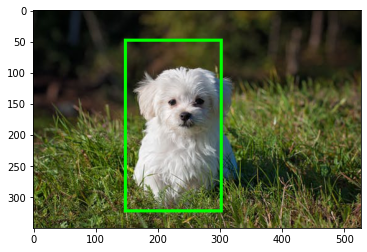

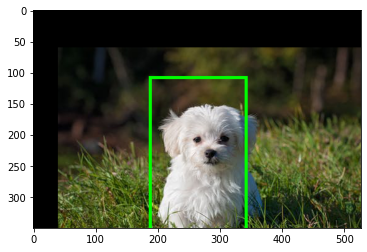

In [0]:
old_img = bb.draw_on_image(img,thickness=5)
new_img = bb_ag.draw_on_image(img_ag,thickness=5)
plt.imshow(old_img)
plt.show()
plt.imshow(new_img)
plt.show()